### وارد کردن کتابخانه ها

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError as MSE, RootMeanSquaredError as RMSE
import matplotlib.pyplot as plt


### خواندن و آماده سازی داده ها

In [5]:
# خواندن فایل CSV
data = pd.read_csv('C:\\Users\\Ali\\Desktop\\FuelConsumption.csv')

# حذف ردیفهایی که مقادیر گم شده دارند
data = data.dropna()

# تعریف ستون هدف
target = 'Main Engine Fuel Consumption (MT/day)'

# حذف ستون هدف از مجموعه ویژگیها
X = data.drop(columns=[target])
y = data[target]

# تقسیم داده ها به مجموعه های آموزشی و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استانداردسازی داده ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KeyError: "['Main Engine Fuel Consumption (MT/day)'] not found in axis"

In [6]:
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


### ساخت و آموزش مدل

In [4]:
# تعریف مدل
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# کامپایل کردن مدل
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[MSE(), RMSE()])

# آموزش مدل
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


C:\Users\Ali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 194.7573 - mean_squared_error: 194.7573 - root_mean_squared_error: 13.5338 - val_loss: 56.8853 - val_mean_squared_error: 56.8853 - val_root_mean_squared_error: 7.5422
Epoch 2/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 48.7039 - mean_squared_error: 48.7039 - root_mean_squared_error: 6.9682 - val_loss: 35.0333 - val_mean_squared_error: 35.0333 - val_root_mean_squared_error: 5.9189
Epoch 3/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 37.0788 - mean_squared_error: 37.0788 - root_mean_squared_error: 6.0813 - val_loss: 27.7683 - val_mean_squared_error: 27.7683 - val_root_mean_squared_error: 5.2696
Epoch 4/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 30.1701 - mean_squared_error: 30.1701 - root_mean_squared_error: 5.4899 - val_loss: 26.0344 - val_mean_squared_error: 26.0344 - val_root_mean_squared_error: 5.1024
Epoch 5/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 26.5741 - mean_squared_error: 26.574

### ارزیابی مدل

In [5]:
# ارزیابی مدل با استفاده از مجموعه تست
loss, mse, rmse = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.0858 - mean_squared_error: 11.0858 - root_mean_squared_error: 3.3223
Test Loss: 10.608610153198242
Mean Squared Error: 10.608610153198242
Root Mean Squared Error: 3.2570860385894775


### پیشبینی و رسم نمودار

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


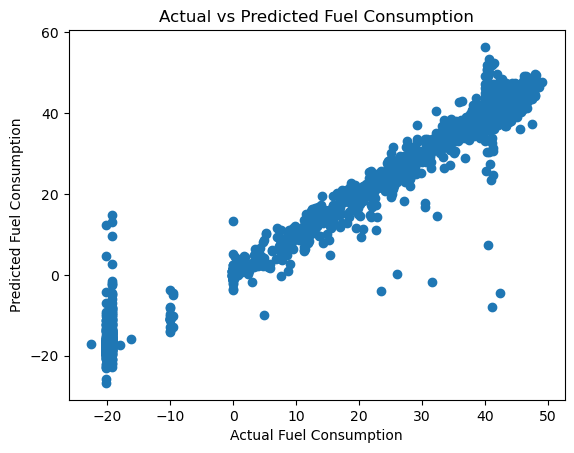

In [7]:
# پیشبینی بر روی مجموعه تست
y_pred = model.predict(X_test)

# رسم نمودار مقادیر واقعی در مقابل مقادیر پیشبینی شده
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Actual vs Predicted Fuel Consumption')
plt.show()
